In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airline = pd.read_csv('international-airline-passengers.csv', names=['Month', 'Passengers'], header=0)
sales = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
air_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
print(airline['Passengers'].mode()[0])
print(airline['Passengers'].mean())
print(airline['Passengers'].median())
print(np.std(airline['Passengers'], ddof=1))
print(airline['Passengers'].value_counts().head(5))

229
280.2986111111111
265.5
119.96631694294321
Passengers
229    3
306    2
405    2
242    2
196    2
Name: count, dtype: int64


In [5]:
airline['Passengers'] = airline['Passengers'].fillna(airline['Passengers'].mean())

In [6]:
dict_series = {
    '#1 International airline passengers: monthly totals in thousands': airline['Passengers'],
    '#2 Monthly sales of company x': sales['Count'],
    '#3 Monthly boston armed robberies': boston['Count'],
    '#4 Mean monthly air temperature deg': air_temp['Deg'],
    '#5 Weekly closings of the dowjones': dowjones['Close'],
    '#6 Daily total female births in cal': female['Count']
    }

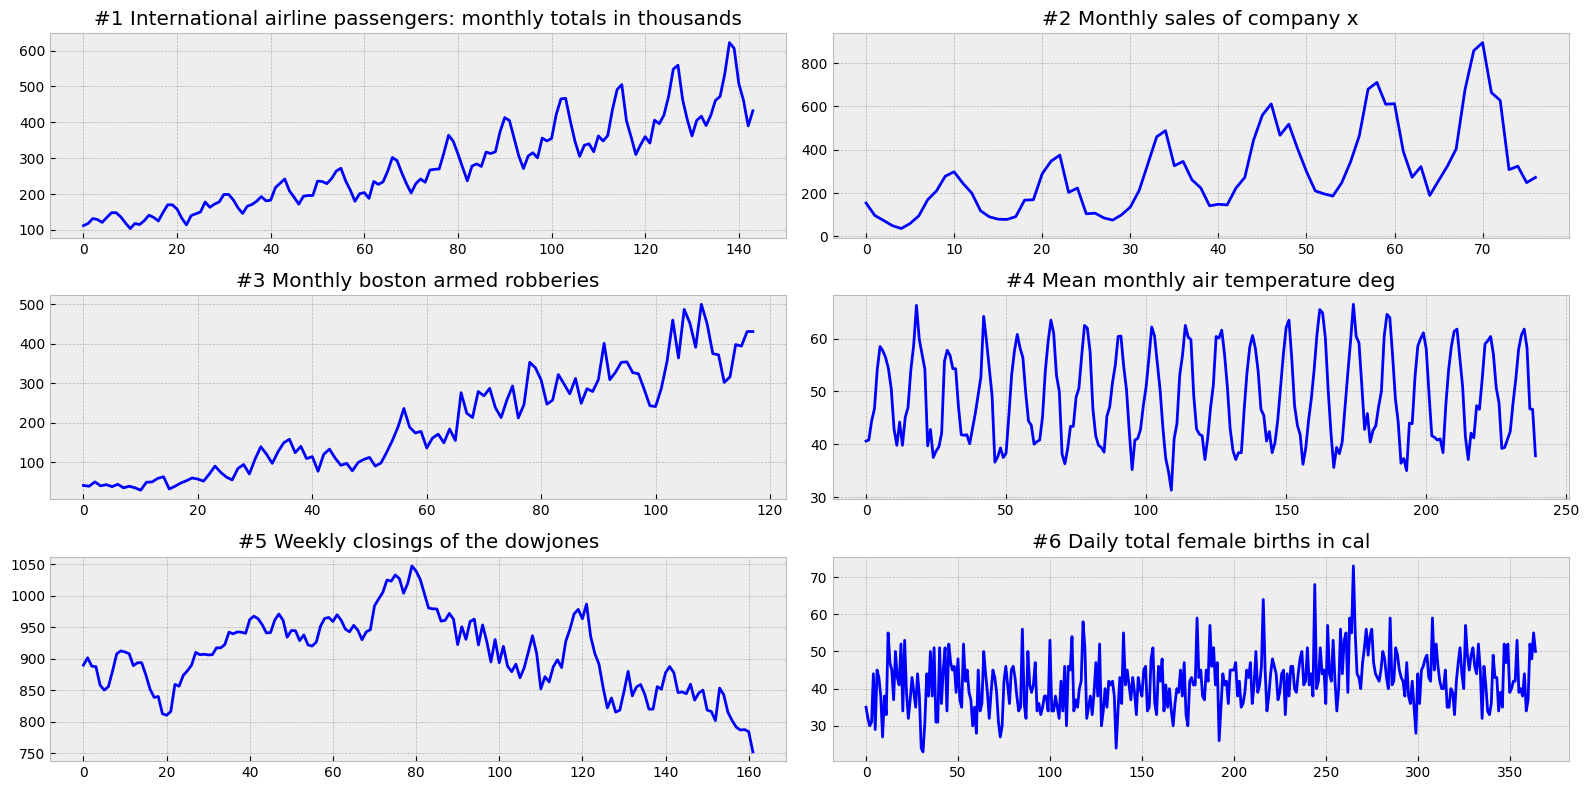

In [7]:
# Изначальные ряды
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(dict_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        dict_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [8]:
# Нормализация дисперсии
from scipy.stats import boxcox

series1 = pd.Series(boxcox(dict_series['#1 International airline passengers: monthly totals in thousands'], 0))
series2 = pd.Series(boxcox(dict_series['#2 Monthly sales of company x'], 0))
series3 = pd.Series(boxcox(dict_series['#3 Monthly boston armed robberies'], 0))
series4 = pd.Series(boxcox(dict_series['#4 Mean monthly air temperature deg'], 0))
series5 = pd.Series(boxcox(dict_series['#5 Weekly closings of the dowjones'], 0))
series6 = pd.Series(boxcox(dict_series['#6 Daily total female births in cal'], 0))

dict_series1 = {
    '#1 International airline passengers: monthly totals in thousands': series1,
    '#2 Monthly sales of company x': series2,
    '#3 Monthly boston armed robberies': series3,
    '#4 Mean monthly air temperature deg': series4,
    '#5 Weekly closings of the dowjones': series5,
    '#6 Daily total female births in cal': series6
    }

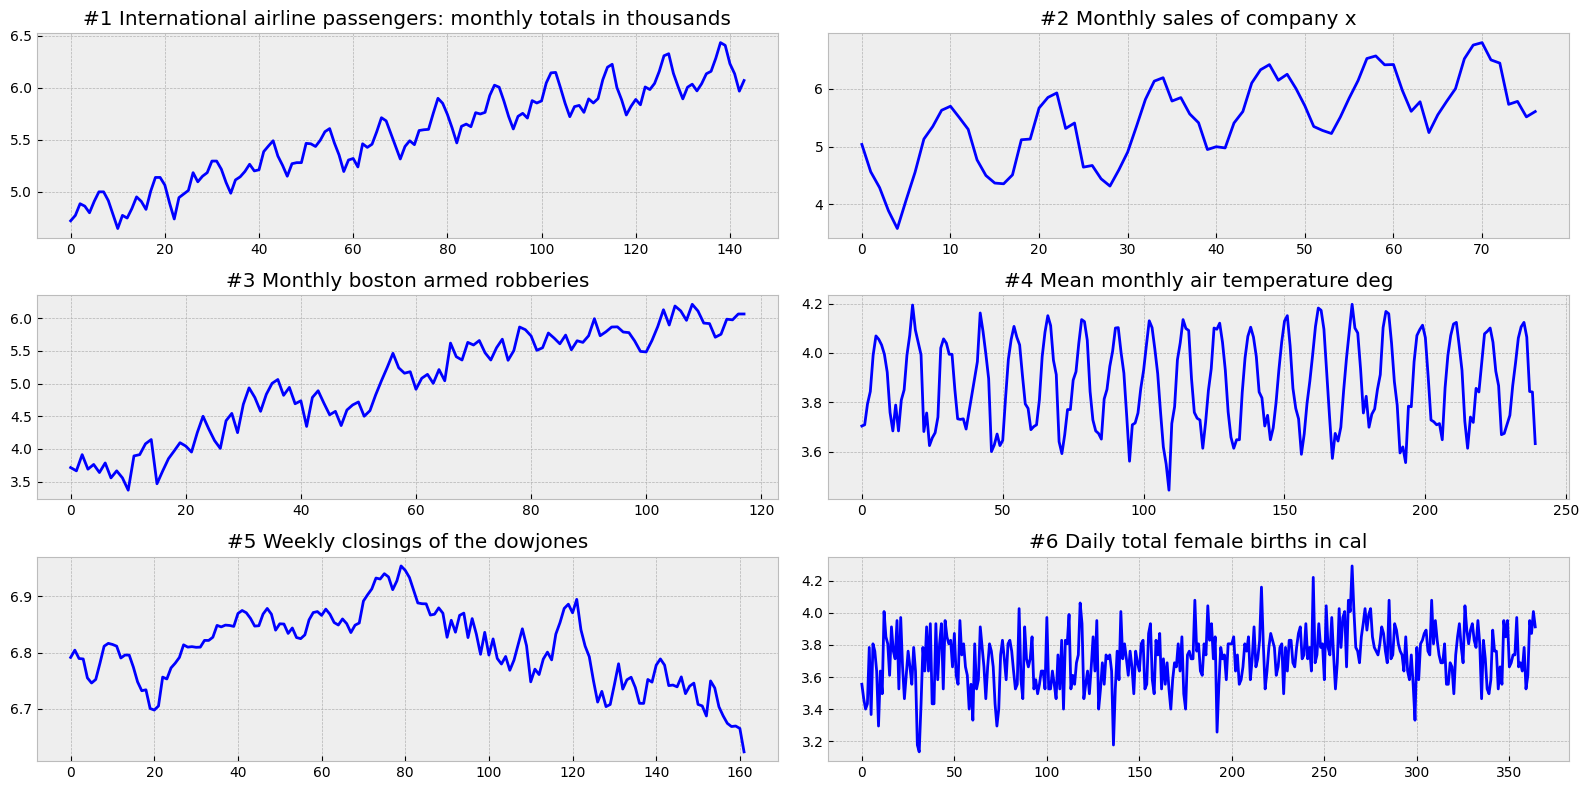

In [9]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(dict_series1.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        dict_series1[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

### В целом не плохо но не идеально, проглядывается сезонность. Уберем и ее из вариантов 1, 2 и 4

In [10]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(12, 4))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

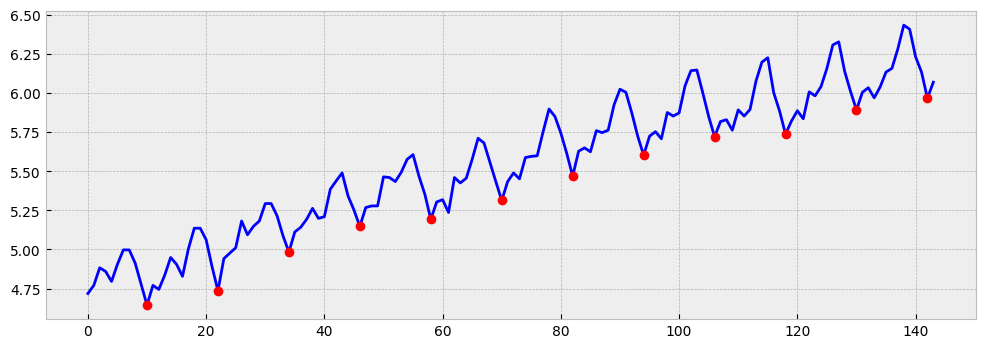

In [11]:
plot_ts_and_points(series1, 10, 12)

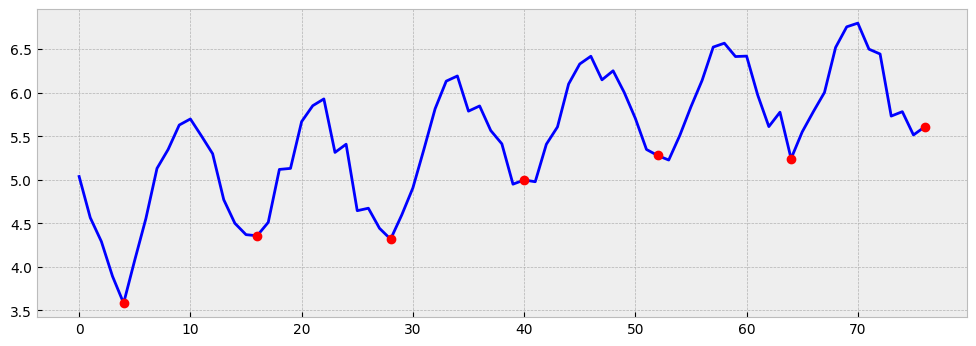

In [12]:
plot_ts_and_points(series2, 4, 12)

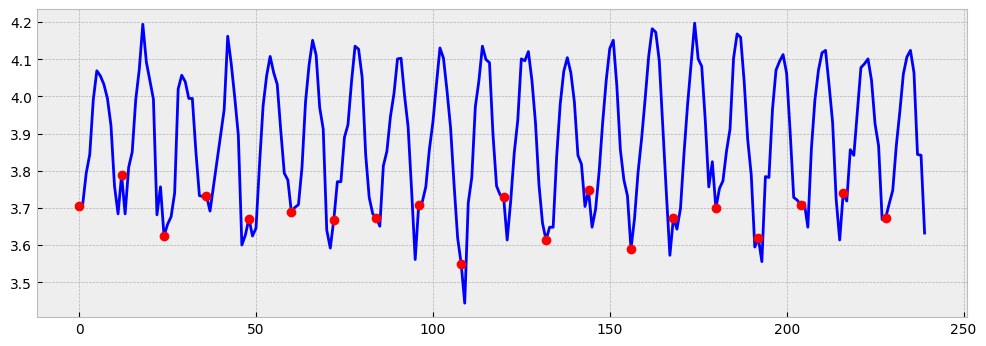

In [13]:
plot_ts_and_points(series4, 0, 12)

In [14]:
# Дифференцируем
series1_1 = pd.Series(np.diff(series1, 6))
series2_2 = pd.Series(np.diff(series2, 3))
series3_3 = pd.Series(np.diff(series3, 1))
series4_4 = pd.Series(np.diff(series4, 3))
series5_5 = pd.Series(np.diff(series5, 1))
series6_6 = pd.Series(np.diff(series6, 1))

dict_series2 = {
    '#1 International airline passengers: monthly totals in thousands': series1_1,
    '#2 Monthly sales of company x': series2_2,
    '#3 Monthly boston armed robberies': series3_3,
    '#4 Mean monthly air temperature deg': series4_4,
    '#5 Weekly closings of the dowjones': series5_5,
    '#6 Daily total female births in cal': series6_6
    }

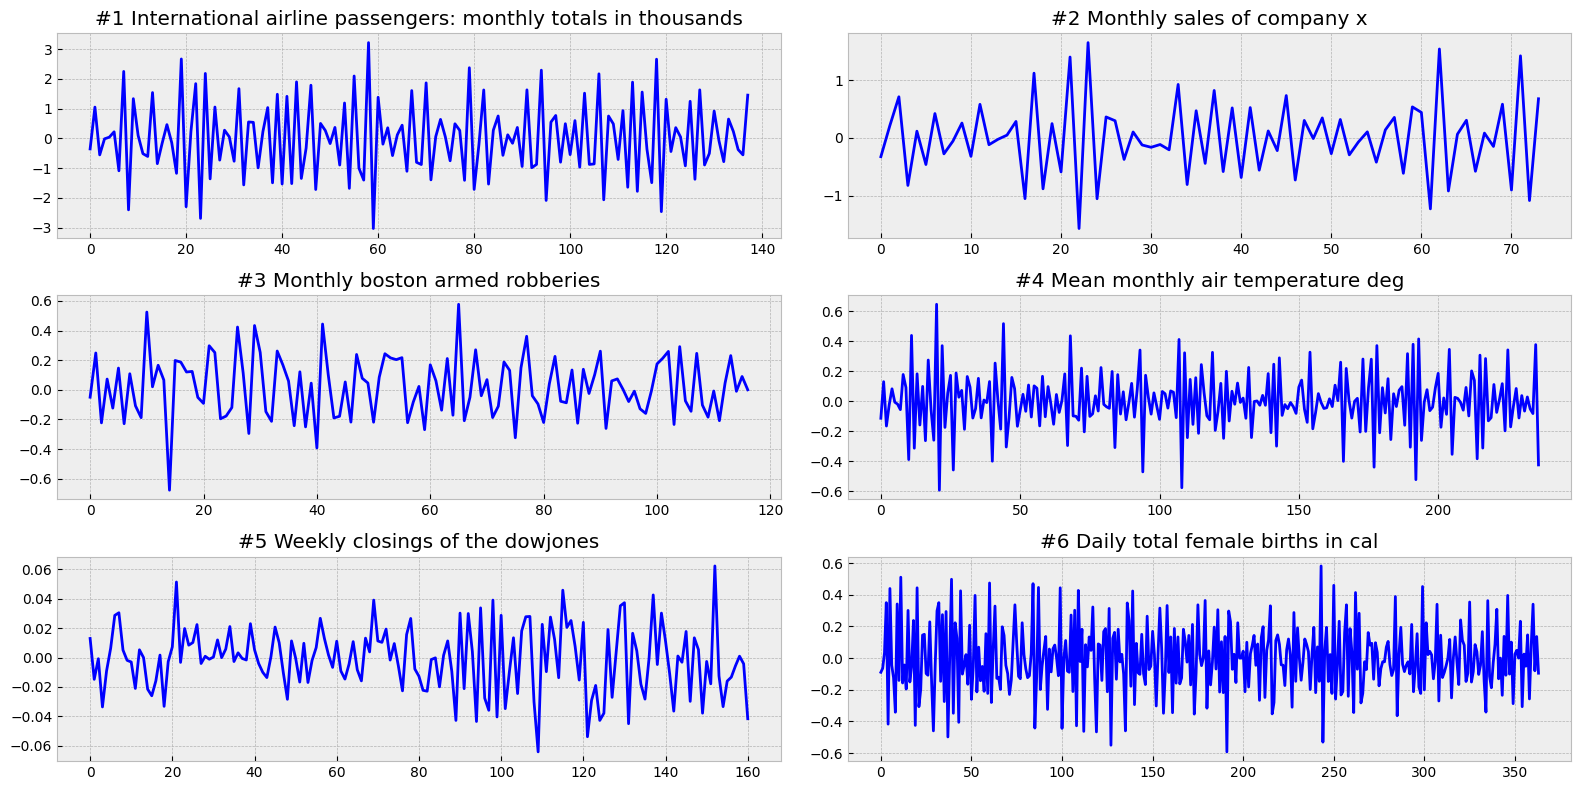

In [15]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(dict_series2.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        dict_series2[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [16]:
# Проведем тест Тест Дики-Фуллера 
from statsmodels.tsa.stattools import adfuller

In [17]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

In [18]:
test_stationarity(series1_1)

Results of Dickey-Fuller Test:


Test Statistic                -6.742655e+00
p-value                        3.090686e-09
#Lags Used                     1.400000e+01
Number of Observations Used    1.230000e+02
Critical Value (1%)           -3.484667e+00
Critical Value (5%)           -2.885340e+00
Critical Value (10%)          -2.579463e+00
dtype: float64

In [19]:
test_stationarity(series2_2)

Results of Dickey-Fuller Test:


Test Statistic                -7.398495e+00
p-value                        7.665079e-11
#Lags Used                     1.200000e+01
Number of Observations Used    6.100000e+01
Critical Value (1%)           -3.542413e+00
Critical Value (5%)           -2.910236e+00
Critical Value (10%)          -2.592745e+00
dtype: float64

In [20]:
test_stationarity(series3_3)

Results of Dickey-Fuller Test:


Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64

In [21]:
test_stationarity(series4_4)

Results of Dickey-Fuller Test:


Test Statistic                -1.379726e+01
p-value                        8.702863e-26
#Lags Used                     1.500000e+01
Number of Observations Used    2.210000e+02
Critical Value (1%)           -3.460291e+00
Critical Value (5%)           -2.874709e+00
Critical Value (10%)          -2.573789e+00
dtype: float64

In [22]:
test_stationarity(series5_5)

Results of Dickey-Fuller Test:


Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64

In [23]:
test_stationarity(series6_6)

Results of Dickey-Fuller Test:


Test Statistic                -1.296334e+01
p-value                        3.191205e-24
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64

### Если основываться на значениях p-value и визуальном анализе графиков, нам удалось сделать их стационарными. p-value<0.05 - признак стационарности. Визуальная оценка, на мой взгляд, такова: графики стационраны - есть плоский шум без особых паттернов.